In [ ]:
# pip install xgboost

In [ ]:
# pip install --upgrade xgboost

In [3]:
import xgboost as xgb

In [4]:
# 原生xgb
# params {eta, gamma, max_depth, min_child_weight, max_delta_step, subsample, colsample_bytree,
# colsample_bylevel, colsample_bynode, lambda, alpha, tree_method string, sketch_eps, scale_pos_weight, updater,
# refresh_leaf, process_type, grow_policy, max_leaves, max_bin, predictor, num_parallel_tree}

# xgboost.train (params, dtrain, num_boost_round=10, evals=(), obj=None, feval=None, maximize=False,
# early_stopping_rounds=None, evals_result=None, verbose_eval=True, xgb_model=None, callbacks=None,
# learning_rates=None)

In [5]:
# sklearn API
# class xgboost.XGBRegressor (max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
# objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
# subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
# base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)

In [6]:
# from xgboost import XGBRFRegressor as XGBR
# from sklearn.ensemble import RandomForestRegressor as RFR
# from sklearn.linear_model import LinearRegression as LR
# from sklearn.datasets import load_boston
# from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
# from sklearn.metrics import mean_squared_error as MSE
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from time import time
# import datetime
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [7]:
data =load_boston()
x = data.data
y = data.target

In [8]:
xtrain,xtest,ytrain,ytest = TTS(x,y,test_size=0.3,random_state=420)
reg = XGBR(n_estimators=100,learning_rate=0.1).fit(xtrain,ytrain)

In [9]:
reg.predict(xtest)

array([ 6.548046 , 22.07592  , 30.861282 , 13.480564 ,  8.555234 ,
       23.640163 , 14.417793 , 15.843951 , 15.741253 , 14.288207 ,
       24.115175 , 34.290897 , 21.42416  , 28.686749 , 19.672836 ,
       10.13208  , 19.36711  , 23.712154 , 22.929077 , 23.140985 ,
       17.79511  , 16.174118 , 27.61351  , 20.924349 , 20.947393 ,
       15.850441 , 22.082499 , 29.280348 , 22.866295 , 15.787387 ,
       36.567562 , 20.854797 , 20.439016 , 23.75265  , 22.987696 ,
       23.763544 , 15.611482 , 24.485449 , 17.679005 , 33.97867  ,
       18.677687 , 20.419485 , 37.105698 , 18.175596 , 12.710485 ,
       31.031075 , 45.83543  , 12.595357 , 10.776696 , 36.08143  ,
       26.379093 , 20.12328  , 20.631485 , 48.80173  , 27.456089 ,
       25.604658 , 17.197208 , 21.34697  , 17.274881 , 18.393429 ,
       14.78816  , 22.8231   , 18.722677 , 30.050531 , 29.76673  ,
       18.67041  , 18.893251 , 16.533218 , 23.053713 , 19.1701   ,
       29.729858 , 42.058952 , 31.42586  , 23.052612 , 19.6766

In [10]:
reg.score(xtest,ytest)

0.9257336899411333

In [11]:
MSE(ytest,reg.predict(xtest))

6.9107686786779885

In [12]:
y.mean()

22.532806324110677

In [13]:
reg.feature_importances_

array([0.0201775 , 0.00237738, 0.01778552, 0.0068847 , 0.04790872,
       0.31648853, 0.01183646, 0.0516636 , 0.01328975, 0.02712934,
       0.0273188 , 0.01543991, 0.44169977], dtype=float32)

In [14]:
reg = XGBR(n_estimators=100)
CVS(reg,xtrain,ytrain,cv=5).mean()

0.799506280269948

In [15]:
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644658473447

In [16]:
rfr = RFR(n_estimators=100)
CVS(rfr,xtrain,ytrain,cv=5).mean()

0.7934991297227816

In [17]:
CVS(rfr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-17.29467489923541

In [18]:
lr = LinearR()
CVS(lr,xtrain,ytrain,cv=5).mean()

0.6835070597278087

In [19]:
CVS(lr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648424

In [20]:
reg = XGBR(n_estimators=100,)
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644658473447

In [21]:
def plot_learning_curve(estimator,title,x,y,ax=None,ylim=None,cv=None,n_jobs=None):
    from sklearn.model_selection import learning_curve
    train_sizes,train_scores,test_scores = learning_curve(estimator,x,y,shuffle=True,cv=cv,n_jobs=n_jobs,random_state=420)
    ax = plt.figure() if ax else plt.gca()
    ax.set_title(title)
    ax.set_ylim(*ylim) if ylim else ax
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='red',label='Training score')
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='green',label='Test score')
    ax.legend(loc='best')
    return ax

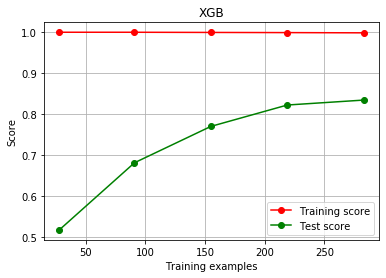

In [22]:
cv =KFold(n_splits=5,shuffle=True,random_state=42)
plot_learning_curve(XGBR(n_estimators=90,learning_rate=0.1,random_state=420,),'XGB',xtrain,ytrain,ax=None,cv=cv)
plt.show()

90 0.835060919887286


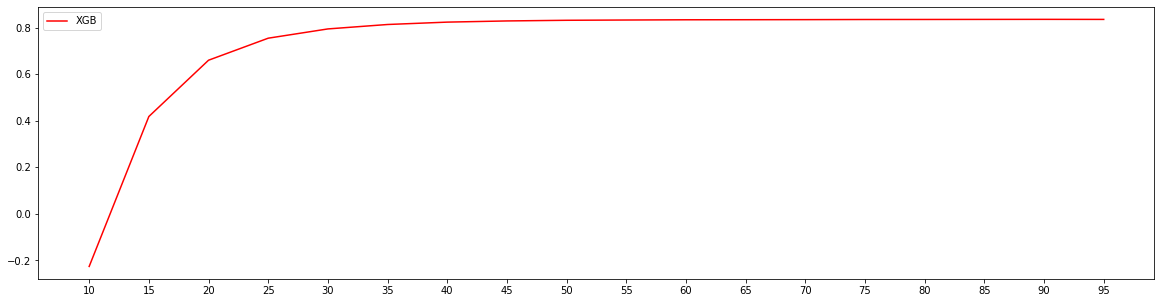

In [23]:
axisx = range(10,100,5)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,learning_rate=0.1,random_state=420)
    rs.append(CVS(reg,xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.xticks(range(10,100,5))
plt.legend()
plt.show()

160 0.8356335616226204 0.004003462963637878
120 0.8354091642185111 0.003958949166110582
130 0.8355583174582332 0.003967584372437679 0.031008651329604904


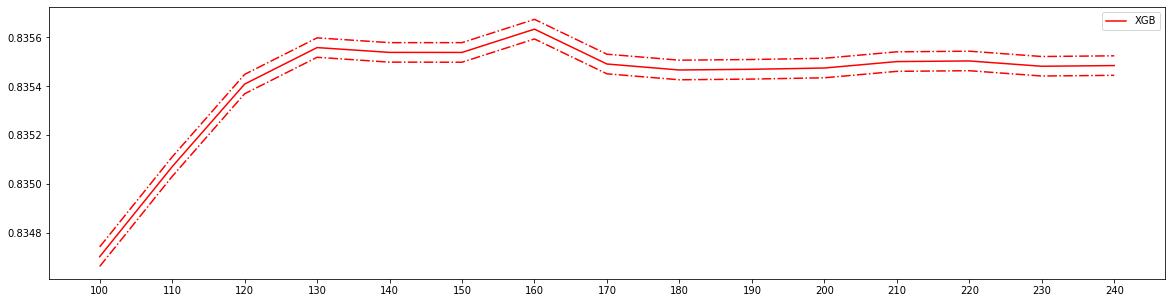

In [24]:
axisx = range(100,250,10)
rs,var,ge =[],[],[]
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,learning_rate=0.1)
    cvresult = CVS(reg,xtrain,ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
rs = np.array(rs)
var = np.array(var)*0.01
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.xticks(axisx)
plt.legend()
plt.show()

In [25]:
time0 = time()
print(XGBR(n_estimators=160,random_state=420,learning_rate=0.1).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time0)

0.9262354547902987
0.12049126625061035


In [26]:
time0 = time()
print(XGBR(n_estimators=160,random_state=420,learning_rate=0.1).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time0)

0.9262354547902987
0.1148979663848877


In [27]:
time0 = time()
print(XGBR(n_estimators=160,random_state=420,learning_rate=0.1).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time0)

0.9262354547902987
0.11967730522155762


1.0 0.8320775357206376


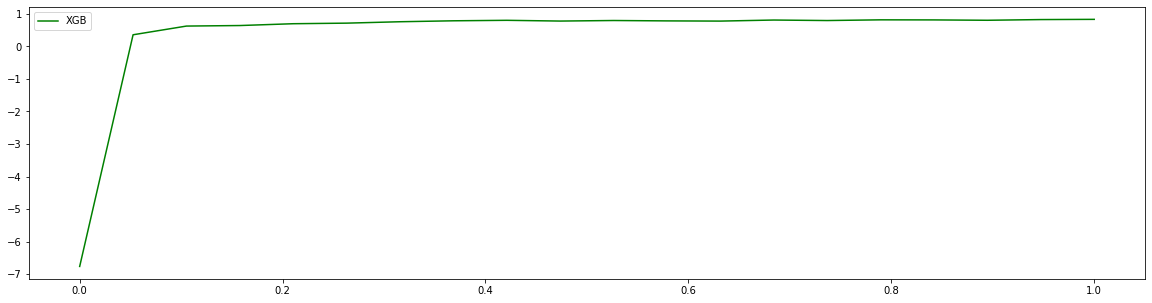

1.0 0.8320775357206376 0.005351385532660411
0.75 0.8173343595502246 0.002674386743068867
1.0 0.8320775357206376 0.005351385532660411 0.033549339542314156


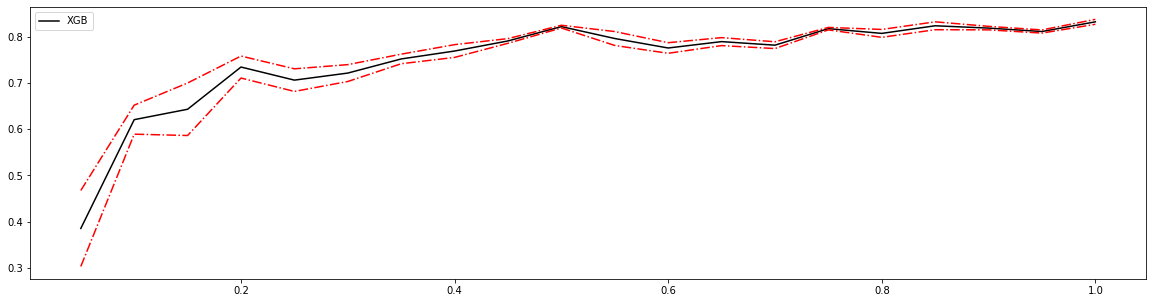

In [28]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()
#细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,xtrain,ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()


In [29]:
reg = XGBR(learning_rate=0.1,n_estimators=180
           ,subsample=1.0
           ,random_state=420).fit(xtrain,ytrain)
reg.score(xtest,ytest)

0.9260984298390122

In [30]:
MSE(ytest,reg.predict(xtest))

6.87682821415069

In [31]:
reg.learning_rate

0.1

In [32]:
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
                                     ,CVS(reg
                                         ,Xtrain,Ytrain
                                         ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [33]:
regassess(reg,xtrain,ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.84
neg_mean_squared_error:-11.98


[0.8354667463386021, -11.979125577990173]

In [34]:
regassess(reg,xtrain,ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.84
neg_mean_squared_error:-11.98


[0.8354667463386021, -11.979125577990173]

In [35]:
%load_ext watermark

In [36]:
%watermark -a "Tsai" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn,xgboost

Tsai 2020-06-04 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
scipy 1.4.1
sklearn 0.22.1
xgboost 1.1.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 12
interpreter: 64bit


In [37]:
for booster in ['gbtree','gblinear','dart']:
    reg = XGBR(n_estimators=180, learning_rate=0.1
               ,random_state=420
               ,booster=booster).fit(xtrain,ytrain)
    print(booster)
    print(reg.score(xtest,ytest))

gbtree
0.9260984298390122
gblinear
0.6529984709290492
dart
0.9260984373654244


In [38]:
import xgboost as xgb

In [39]:
dtrain = xgb.DMatrix(xtrain,ytrain)
dtest = xgb.DMatrix(xtest,ytest)
param={'objective':'reg:squarederror','eta':0.1}
num_round=180
bst = xgb.train(param,dtrain,num_boost_round=num_round)
from sklearn.metrics import r2_score
r2_score(ytest,bst.predict(dtest))

0.9260984298390122

In [40]:
MSE(ytest,bst.predict(dtest))

6.87682821415069

0.05 0.8414701503688864 0.003922608239321677
0.1 0.838992885797144 0.003817000687285285
0.05 0.8414701503688864 0.003922608239321677 0.029054321463385168


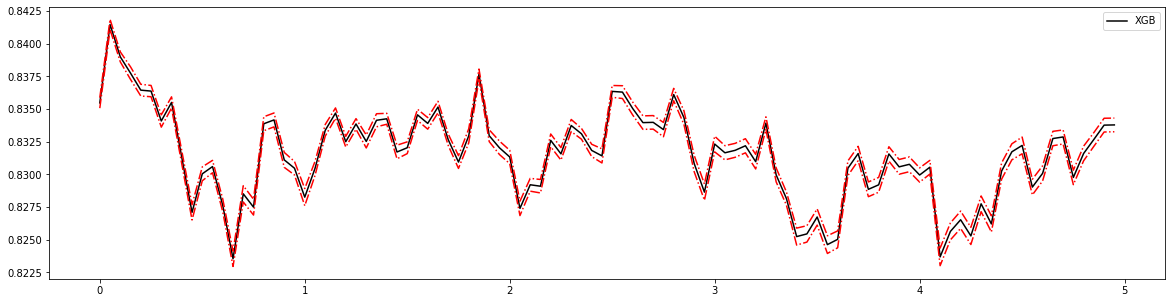

In [41]:
axisx = np.arange(0,5,0.05)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=0.1,gamma=i)
    result = CVS(reg,xtrain,ytrain,cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1 - result.mean())**2+result.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [42]:
import xgboost as xgb
dfull = xgb.DMatrix(x,y)
param1={'objective':'reg:squarederror','gamma':0,'verbosity':1,'eval_metric':'mae'}
num_round = 180
n_fold =5
time0=time()
cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))


00:00:909696


In [43]:
cvresult1

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,15.584199,0.099560,15.536390,0.408497
1,11.034416,0.074109,11.045686,0.313729
2,7.837214,0.048848,7.988935,0.268053
3,5.595793,0.036750,5.882034,0.277657
4,4.019173,0.021391,4.524978,0.307831
...,...,...,...,...
175,0.000909,0.000195,2.325465,0.369672
176,0.000897,0.000173,2.325460,0.369678
177,0.000888,0.000155,2.325466,0.369671
178,0.000881,0.000140,2.325461,0.369677


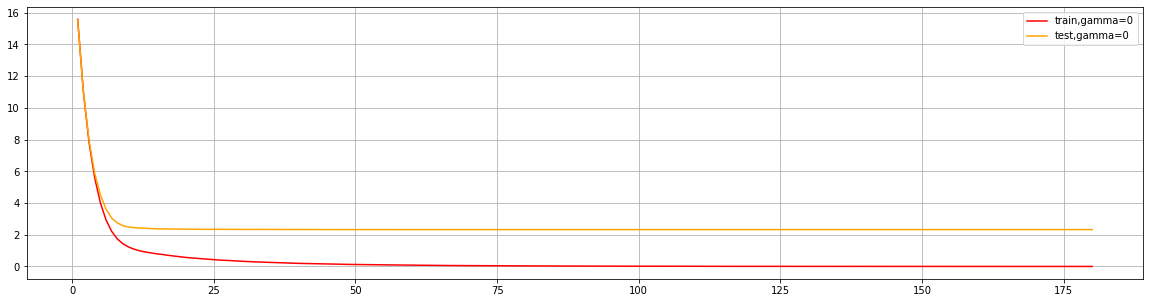

In [44]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

00:00:971756
00:01:019203


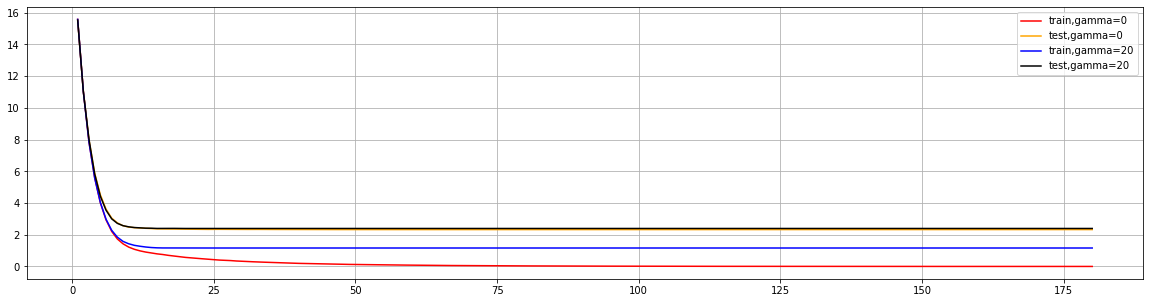

In [45]:
import xgboost as xgb
dfull = xgb.DMatrix(x,y)
param1={'objective':'reg:squarederror','gamma':0,'verbosity':1,'eval_metric':'mae'}
param2={'objective':'reg:squarederror','gamma':20,'verbosity':1,'eval_metric':'mae'}
num_round = 180
n_fold =5
time0=time()
cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))
time0=time()
cvresult2 = xgb.cv(param2,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="blue",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="k",label="test,gamma=20")
plt.legend()
plt.show()

00:00:313882
00:00:571164


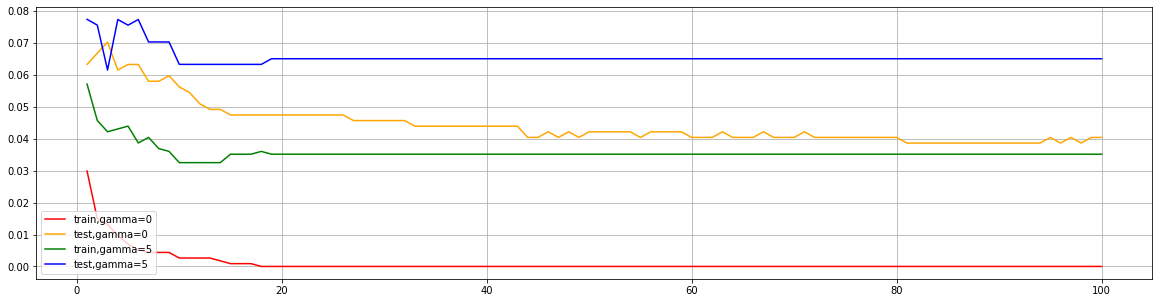

In [46]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()
x2 = data2.data
y2 = data2.target
dfull2 = xgb.DMatrix(x2,y2)
param1 = {'verbosity':0,'objective':'binary:logistic',"gamma":0,"nfold":5,'eval_metric':'error'}
param2 = {'verbosity':0,'objective':'binary:logistic',"gamma":20,"nfold":5,'eval_metric':'error'}
num_round = 100
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=5")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=5")
plt.legend()
plt.show()


00:00:655907


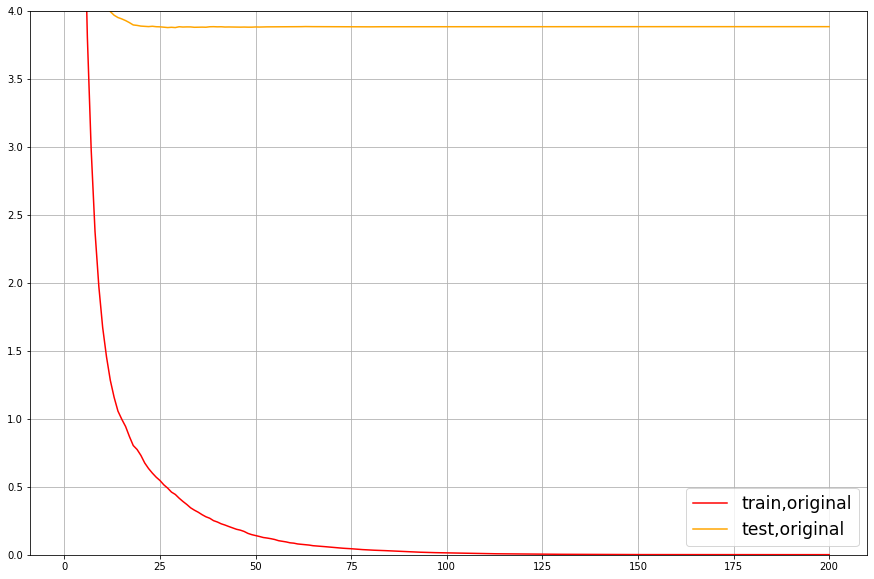

In [47]:
dfull = xgb.DMatrix(x,y)
param1={'verbosity':0,
        'objective':'reg:squarederror',
       'subsample':1,
        'max_depth':6,
        'eta':0.3,
        'gamma':0,
        'lambda':1,
        'alpha':0,
        'colsample_bytree':1,
        'colsample_bylevel':1,
        'colsample_bunode':1,
        'nfold':5
       }
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig,ax = plt.subplots(1,figsize=(15,10))

ax.set_ylim(top=4)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:429036


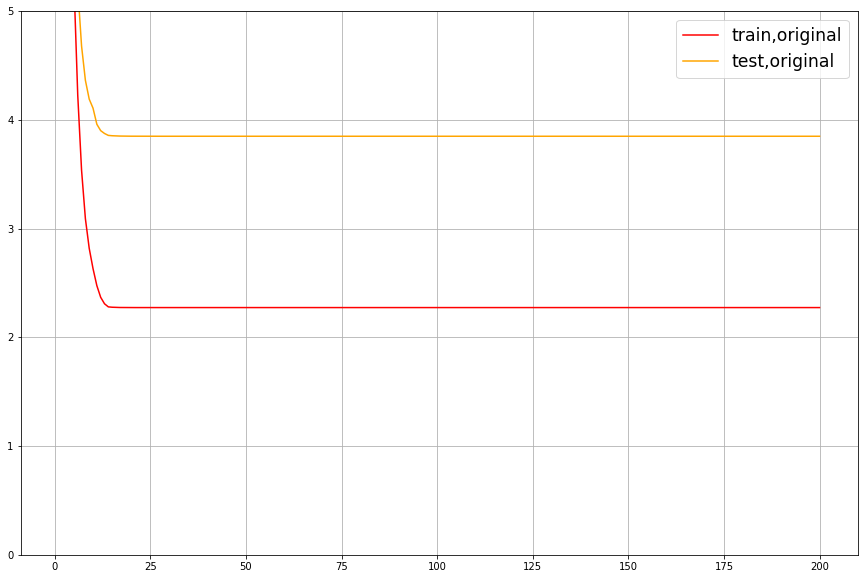

In [48]:
dfull = xgb.DMatrix(x,y)
param1={'verbosity':0,
        'objective':'reg:squarederror',
       'subsample':1,
        'max_depth':3,
        'eta':0.3,
        'gamma':50,
        'lambda':1,
        'alpha':0,
        'colsample_bytree':1,
        'colsample_bylevel':1,
        'colsample_bunode':1,
        'nfold':5
       }
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig,ax = plt.subplots(1,figsize=(15,10))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [55]:
dfull = xgb.DMatrix(x,y)
param1={'verbosity':[0],
        'objective':['reg:squarederror'],
       'subsample':[1],
        'max_depth':range(1,5),
        'learning_rate':np.linspace(0,0.2,5),
        'gamma':np.linspace(0,20,20),
#         'lambda':np.linspace(0,20,20),
#         'alpha':np.linspace(0,20,20),
#         'colsample_bytree':np.linspace(0,1,20),
#         'colsample_bylevel':np.linspace(0,1,20),
#         'colsample_bunode':np.linspace(0,1,20),
#         'nfold':[5]
       }
num_round = 200
time0 = time()
reg = estimator = XGBR(
       eta =0.1, n_estimators=180, max_depth=6,
        gamma=0, subsample=1,colsample_bytree=1,)
gs = GridSearchCV(estimator = reg,
       param_grid=param1,cv=5)
gs.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=1,
                                    eta=0.1, gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=6, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimat...
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ]),
                         'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 

In [53]:
gs.best_params_

{'eta': 0.0,
 'gamma': 0.0,
 'max_depth': 3,
 'objective': 'reg:squarederror',
 'subsample': 1,
 'verbosity': 0}

In [51]:
np.linspace(0,20,20)

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [65]:
class MyXGBoostEstimator:
    def __init__(self, **params):
        self.params = params
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        # 默认是回归，如果是分类，要修改objective
        self.params.update({'verbosity':0, 'objective':'reg:squarederror', 'seed':0})
        
    def fit(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, y_train)
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round)
        
    def predict(self, x_pred):
        dpred = xgb.DMatrix(x_pred)
        return self.bst.predict(dpred)
    
    def kfold(self, x_train, y_train, nfold=5):
        dtrain = xgb.DMatrix(x_train, y_train)
        
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                           nfold=nfold, early_stopping_rounds=10)
        
        return cv_rounds.iloc[-1,:]

    def get_params(self, deep=True):
        return self.params
    
    def set_params(self, **params):
        self.params.update(params)
        return self
    

In [67]:
from sklearn.metrics import mean_squared_error
def score_fn(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))
from sklearn.metrics import make_scorer
cv_score_fn = make_scorer(score_fn, greater_is_better=False)
param_grid = {'max_depth': range(1,10,2), 
             'min_child_weight': range(1,10,2),
#              'subsample': range(1,10,2),
             'colsample_bytree': list([0.8, 1]),
             'learning_rate':np.linspace(0,0.2,5)}


model = MyXGBoostEstimator(num_boost_round=100)

grid = GridSearchCV(model, param_grid=param_grid, cv=3, scoring=cv_score_fn)

grid.fit(xtrain, ytrain)

print(grid.best_params_)




{'colsample_bytree': 0.8, 'learning_rate': 0.15000000000000002, 'max_depth': 9, 'min_child_weight': 3}


In [ ]:
# n_estimators与eta共同调节，gamma或者max_depth，采样和抽样参数（纵向抽样影响更大），最后才是正则化的两个参数。